# TP CLUSTERING

## 1- Choix du jeu de données

In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabaz_score
import numpy as np 
import hdbscan

### convexe / bien séparé / densité similaire / non bruité

In [2]:
dataset1 = arff.loadarff(open('curve.arff','r'))[0]

### non convexe / bien séparé / densité similaire / bruité

In [3]:
dataset2 = arff.loadarff(open('zelnik4.arff','r'))[0]

### non convexe / mal séparé / densité similaire / non bruité

In [4]:
dataset3 = arff.loadarff(open('engytime.arff','r'))[0]

### convexe / bien séparé / densité similaire / non bruité

In [5]:
dataset4 = arff.loadarff(open('cure.arff','r'))[0]

### non convexe / mal séparé / densité similaire / non bruité

In [6]:
dataset5 = arff.loadarff(open('banana.arff','r'))[0]

### dataset diamond

In [7]:
dataset6=arff.loadarff(open('diamond9.arff','r'))[0]

In [8]:
def afficher(dataset):
    lst = []
    for i in dataset:
        if i[2].decode("ascii") not in lst:
            lst.append(i[2].decode("ascii"))
    coord = []
    for j in range(len(lst)):
        coord.append([[],[]])
        for i in dataset:
            if i[2].decode("ascii") == lst[j]:
                coord[j][0].append(i[0])
                coord[j][1].append(i[1])
        plt.scatter(coord[j][0],coord[j][1])
    plt.show()


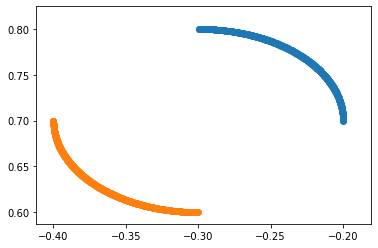

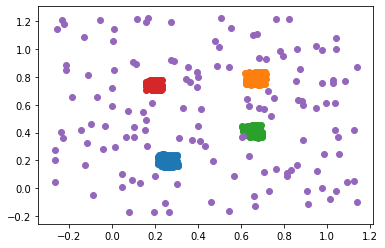

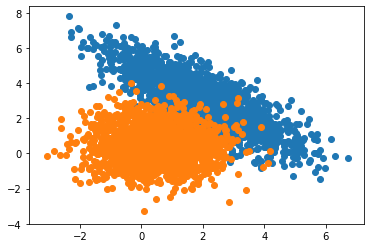

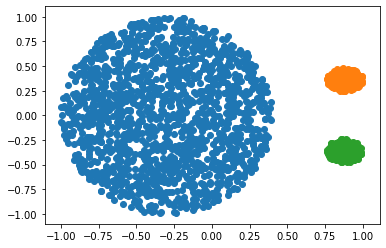

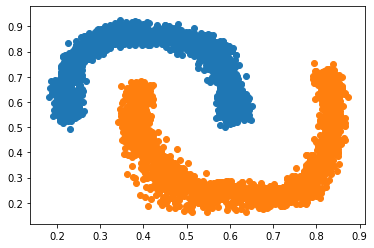

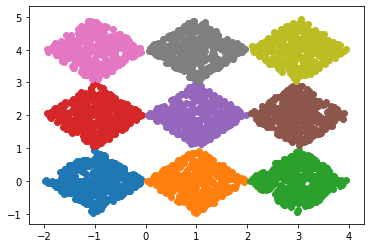

In [15]:
afficher(dataset1)
afficher(dataset2)
afficher(dataset3)
afficher(dataset4)
afficher(dataset5)
afficher(dataset6)

In [11]:
def formatage(dataset):
    coord = []
    for i in dataset:
        coord.append([i[0],i[1]])
    return np.asarray(coord)    


In [12]:

def affichage3(data,DB):
    data = data.transpose()
    plt.scatter(data[0],data[1],c=DB.labels_)
    plt.title('HDBSCAN clustering on the digits dataset')
    plt.show()


In [13]:
import warnings
warnings.filterwarnings("ignore")

[  2  79 157 234 312 389 467 544 622 700]


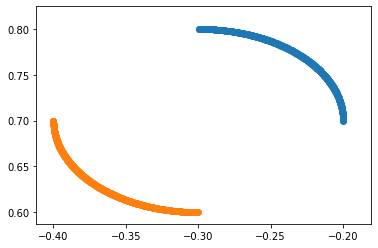

2
79
157
234
312
389
467
544
622
700


In [94]:
dataset = dataset1


#L = ["best", "generic", "prims_kdtree", "prims_balltree", "boruvka_kdtree", "boruvka_balltree"]
max_cs = int((dataset.shape[0])*0.7)
max_ms = int((dataset.shape[0])*0.7)
G = np.linspace(2, max_cs, 10, dtype=int)
H = np.linspace(1, max_ms, 10, dtype=int)

combo = []

Davies = [] #keep min
Calinski = [] #keep max

clusterer = hdbscan.HDBSCAN(core_dist_n_jobs = -1)
data = formatage(dataset)
clusterer.fit(data)
labels = clusterer.labels_
#default min_cluster_size=5, min_samples=None
combo.append((5,None))
Davies.append(davies_bouldin_score(data,labels))
Calinski.append(calinski_harabaz_score(data,labels))

print(G)

afficher(dataset)   
for clus_size in G:
    print(clus_size)
    for min_sam in H:
        clusterer = hdbscan.HDBSCAN(core_dist_n_jobs = -1, min_cluster_size = int(clus_size), min_samples = int(min_sam))
        data = formatage(dataset)
        clusterer.fit(data)

        labels = clusterer.labels_
        if labels.max() > 1:
            combo.append((clus_size, min_sam))
            Davies.append(davies_bouldin_score(data,labels))
            Calinski.append(calinski_harabaz_score(data,labels))

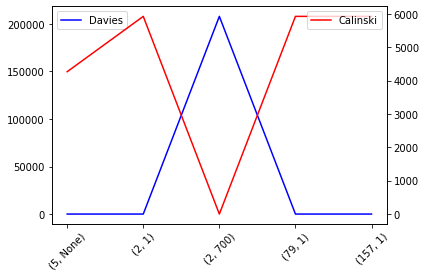

In [95]:
combo2 = []
for www in combo:
    combo2.append(str(www))

plt.plot(combo2, Davies, c="blue", label="Davies")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.twinx()
plt.plot(Calinski, c="red", label="Calinski")
plt.legend(loc="upper right")

plt.show()

In [102]:
nn=0
print(combo[nn])

(5, None)


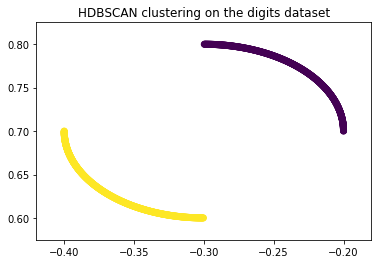

In [103]:
clusterer = hdbscan.HDBSCAN(core_dist_n_jobs = -1, min_cluster_size = int(combo[nn][0]), min_samples = int(combo[nn][1]) if combo[nn][1] != None else None)
data = formatage(dataset)
clusterer.fit(data)
labels = clusterer.labels_

affichage3(data,clusterer)